# Hydrosphere

## Exercise 1

Poniższa tabela przedstawia zmienność parametrów fizyko-chemicznych wód w epi- i hipolimnionie jeziora strefy umiarkowanej. Na podstawie tych danych:

1. sporządź wykresy ilustrujące zmiany sezonowe w obu strefach jeziora

2. przedstaw i wyjaśnij różnice między epi- i hipolimnionem

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
lake_data = pd.read_csv('data/lake-parameters.csv')


In [4]:
lake_data

,Month,epi_temp,epi_pH,epi_TDS,hypo_temp,hypo_pH,hypo_TDS
0,Styczeń,NaN,NaN,NaN,NaN,NaN,NaN
1,Luty,1.8,7.7,221.7,5.2,7.1,344.9
2,Marzec,4.4,8.3,166.9,5.2,7.4,314.3
3,Kwiecień,12.6,8.8,183.8,4.8,7.1,349.5
4,Maj,16.3,8.6,183.5,4.7,7.1,333.9
5,Czerwiec,18.4,8.5,174.8,4.7,7.1,337.1
6,Lipiec,22.7,8.6,159.7,4.7,7.0,339.6
7,Sierpień,21.1,8.8,152.1,4.8,7.3,332.5
8,Wrzesień,17.2,8.7,158.3,4.8,7.3,332.7
9,Październik,9.1,7.8,164.3,4.8,7.1,329.9


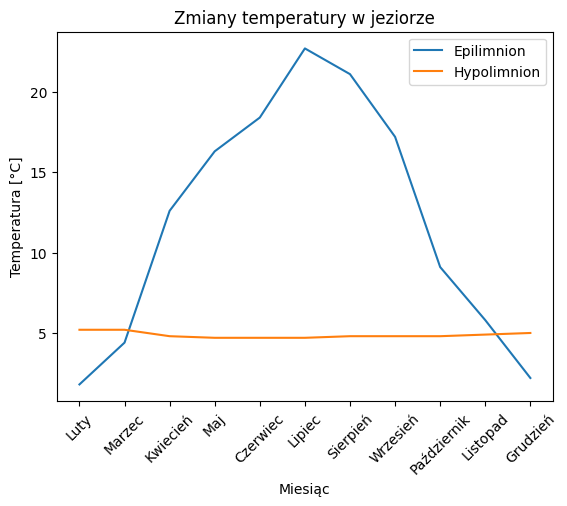

In [7]:
## Temperature plot

plt.plot(lake_data['Month'], lake_data['epi_temp'], lake_data['hypo_temp'])
plt.xlabel('Miesiąc')
plt.ylabel('Temperatura [°C]')
plt.title('Zmiany temperatury w jeziorze')
plt.legend(['Epilimnion', 'Hypolimnion'])
plt.xticks(rotation=45)
plt.show()


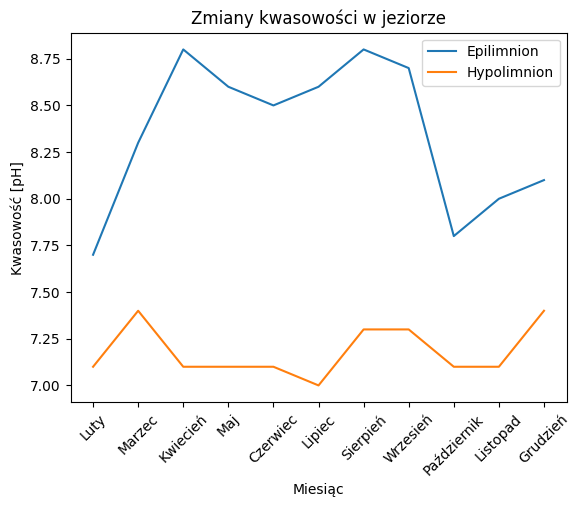

In [9]:
## Acidity plot

plt.plot(lake_data['Month'], lake_data['epi_pH'], lake_data['hypo_pH'])
plt.xlabel('Miesiąc')
plt.ylabel('Kwasowość [pH]')
plt.title('Zmiany kwasowości w jeziorze')
plt.legend(['Epilimnion', 'Hypolimnion'])
plt.xticks(rotation=45)
plt.show()


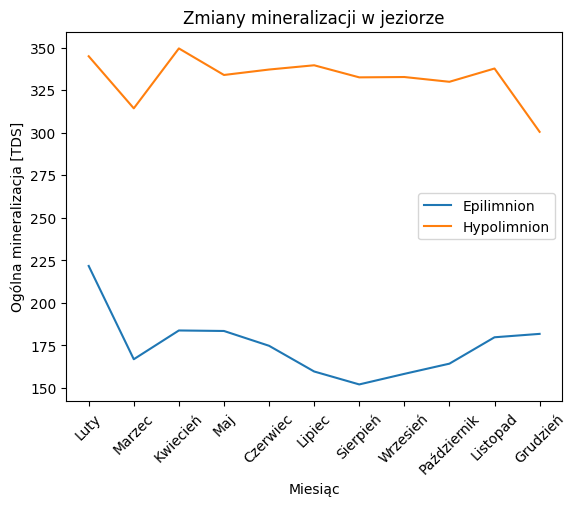

In [10]:
## Acidity plot

plt.plot(lake_data['Month'], lake_data['epi_TDS'], lake_data['hypo_TDS'])
plt.xlabel('Miesiąc')
plt.ylabel('Ogólna mineralizacja [TDS]')
plt.title('Zmiany mineralizacji w jeziorze')
plt.legend(['Epilimnion', 'Hypolimnion'])
plt.xticks(rotation=45)
plt.show()


## Exercise 4

Istotnym wskaźnikiem związanym z natlenieniem jest nasycenie (saturacja) wody tlenem. Wskaźnik ten wyraża ilość tlenu rozpuszczonego w wodzie w stosunku do maksymalnej możliwej koncentracji $O_2$ w danej temperaturze (t) i zasoleniu (S) przy założeniu stanu równowagi gazowej z atmosferą (tzw. koncentracja równowagowa). Saturacja wyrażana jest w [\%]. Saturację 75\% (t = 5°C, S = 5‰) zinterpretujemy następująco: ilość $O_2$ w wodzie wynosi 75\% ilości, która w danych warunkach t i S może się rozpuścić w wodzie. Wartości <100\% wskazują na niedosycenie (a więc np. konsumpcję $O_2$ przez procesy mikrobiologiczne), a wartości >100\% oznaczają przesycenie. Do tego drugiego przypadku dochodzi przy nadprodukcji $O_2$ w warunkach silnej aktywności fitoplanktonu bądź np. napowietrzania przy silnej turbulencji. Saturacja tlenem jest więc wskaźnikiem o bardzo dużym znaczeniu interpretacyjnym.

In [11]:
saturation = pd.read_csv('data/oxygen-saturation.csv')

In [12]:
saturation

,salinity,temperature-5,temperature-10,temperature-25
0,0,14.60,11.34,9.10
1,5,14.12,11.20,9.00
2,10,13.65,11.00,8.85


Text(0.5, 1.0, 'Wykres rozpuszczalności tlenu w wodzie w funkcji temperatury')

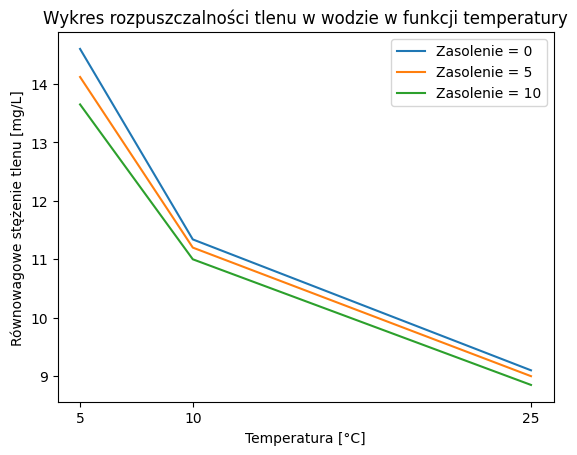

In [29]:
plt.plot(np.array([5,10,25]), saturation.iloc[0][1:], label='Zasolenie = 0' )
plt.plot(np.array([5,10,25]), saturation.iloc[1][1:], label='Zasolenie = 5' )
plt.plot(np.array([5,10,25]), saturation.iloc[2][1:], label='Zasolenie = 10' )

plt.legend()
plt.xticks([5,10,25])
plt.xlabel('Temperatura [°C]')
plt.ylabel('Równowagowe stężenie tlenu [mg/L]')
plt.title('Wykres rozpuszczalności tlenu w wodzie w funkcji temperatury')

Text(0.5, 1.0, 'Wykres rozpuszczalności tlenu w wodzie w funkcji zasolenia')

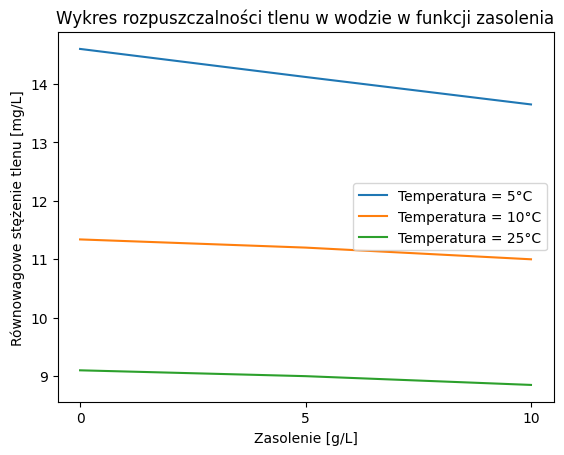

In [30]:
plt.plot(saturation["salinity"], saturation['temperature-5'], label='Temperatura = 5°C' )
plt.plot(saturation["salinity"], saturation['temperature-10'], label='Temperatura = 10°C' )
plt.plot(saturation["salinity"], saturation['temperature-25'], label='Temperatura = 25°C' )

plt.legend()
plt.xticks([0,5,10])
plt.xlabel('Zasolenie [g/L]')
plt.ylabel('Równowagowe stężenie tlenu [mg/L]')
plt.title('Wykres rozpuszczalności tlenu w wodzie w funkcji zasolenia')

In [35]:
values = np.array([saturation["temperature-5"].to_numpy(), saturation["temperature-10"].to_numpy(), saturation["temperature-25"].to_numpy()]).T
oxygen_saturation = np.round(10.0/values * 100,2)
oxygen_saturation

array([[ 68.49,  88.18, 109.89],
       [ 70.82,  89.29, 111.11],
       [ 73.26,  90.91, 112.99]])

## Zadanie 5

Poniższa tabela przedstawia porównanie wybranych podstawowych własności chemicznych wód w trzech typach troficznych jezior Polski. Na wykresach przedstaw zróżnicowanie tych jezior w układzie pH-EC oraz DOC-HCO3- oraz wyjaśnij jego przyczyny

In [38]:
lakes = pd.read_csv('data/lake-chemical-properties.csv')

In [39]:
lakes

,Typ troficzny,Jezioro,pH,EC,DOC,HCO3-
0,MEZOTROFICZNE,Hańcza,7.9,248,4.1,157.0
1,MEZOTROFICZNE,Wigry,8.1,364,4.1,205.0
2,MEZOTROFICZNE,Busznica,7.9,210,3.3,150.0
3,MEZOTROFICZNE,Rozpuda,8.0,305,1.8,196.0
4,MEZOTROFICZNE,Piaszeczno,7.4,90,4.5,33.0
5,MEZOTROFICZNE,Rogoźno,7.6,245,7.1,134.0
6,MEZOTROFICZNE,Bialskie,8.0,315,6.1,167.0
7,MEZOTROFICZNE,Ciecz,7.8,402,3.6,242.0
8,MEZOTROFICZNE,Wdzydze S,8.1,213,NaN,288.0
9,EUTROFICZNE,Necko,7.8,407,9.1,229.0


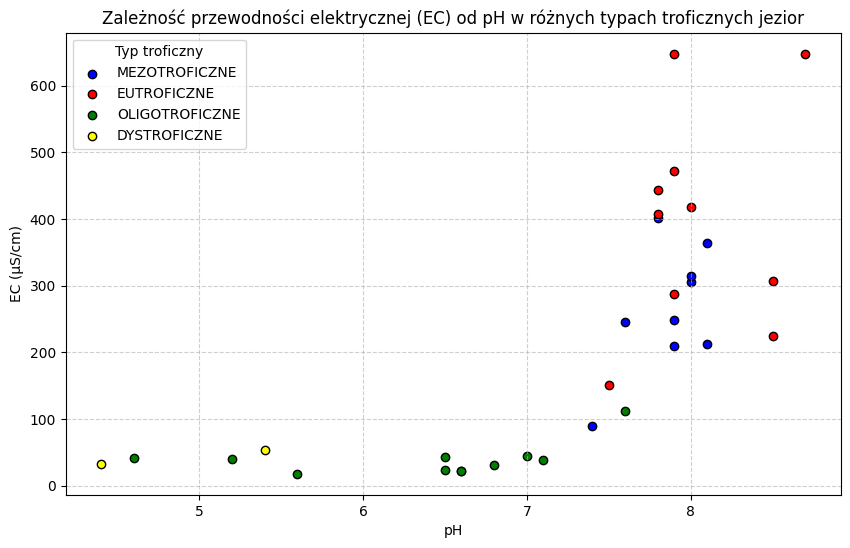

In [41]:
colors = {
    "MEZOTROFICZNE": "blue",
    "EUTROFICZNE": "red",
    "OLIGOTROFICZNE": "green",
    "DYSTROFICZNE": "yellow"
}

plt.figure(figsize=(10, 6))
for typ in lakes["Typ troficzny"].unique():
    subset = lakes[lakes["Typ troficzny"] == typ]
    plt.scatter(subset["pH"], subset["EC"], label=typ, color=colors[typ], edgecolors='black')

# Opis osi
tl = "Zależność przewodności elektrycznej (EC) od pH w różnych typach troficznych jezior"
plt.title(tl, fontsize=12)
plt.xlabel("pH")
plt.ylabel("EC (µS/cm)")
plt.legend(title="Typ troficzny")
plt.grid(True, linestyle="--", alpha=0.6)

# Wyświetlenie wykresu
plt.show()

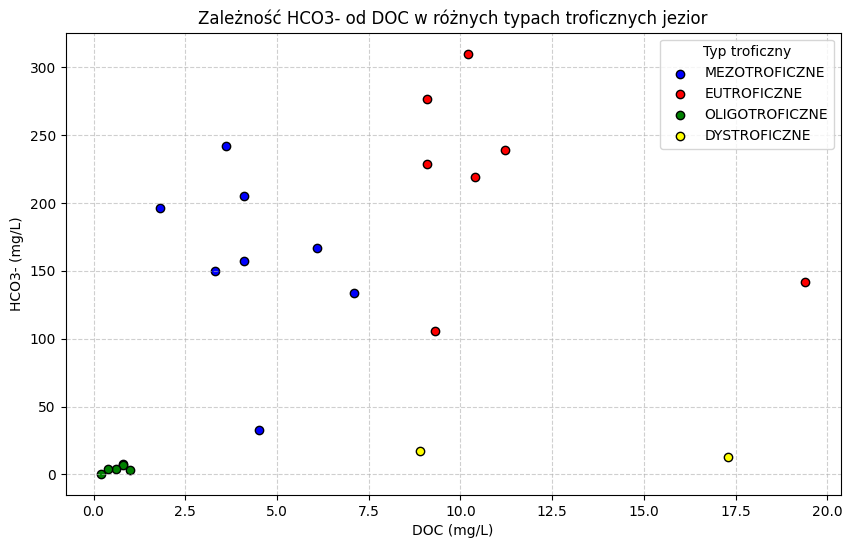

In [42]:
colors = {
    "MEZOTROFICZNE": "blue",
    "EUTROFICZNE": "red",
    "OLIGOTROFICZNE": "green",
    "DYSTROFICZNE": "yellow"
}

plt.figure(figsize=(10, 6))
for typ in lakes["Typ troficzny"].unique():
    subset = lakes[lakes["Typ troficzny"] == typ]
    plt.scatter(subset["DOC"], subset["HCO3-"], label=typ, color=colors[typ], edgecolors='black')

# Opis osi
tl = "Zależność HCO3- od DOC w różnych typach troficznych jezior"
plt.title(tl, fontsize=12)
plt.xlabel("DOC (mg/L)")
plt.ylabel("HCO3- (mg/L)")
plt.legend(title="Typ troficzny")
plt.grid(True, linestyle="--", alpha=0.6)

# Wyświetlenie wykresu
plt.show()